# Project 3

# Computational Linear Algebra for Large Scale Problems

# Arash Daneshvar

# s314415

<div class="centered">
    <h1 class="header-font">Homework - Principal Components Analysis</h1>
</div>

<div>
    <p class='custom-font'>In this project, I aim to use Principal Component Analysis (PCA) to reduce the dimensionality of the dataset 'cla4lsp_customers.csv'. Subsequently, I applied the K-Means algorithm to identify significant clusters.</p>
</div>


<div>
    <h2 class='header-font'>Import Libraries</h2>
</div>

<div>
    <p class='custom-font'>First of all, the libraries used in this project must be imported</p>
</div>


In [1]:
# Import necessary library  

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import yaml
import matplotlib.pyplot as plt
import scipy

<div>
    <h2 class='header-font'>0. Preparation (Setting the Random State):</h2>
</div>

<div>
    <p class='custom-font'>Before starting with the exercises, initialize a random state variable "rs" equal to the minimum of the ID student numbers of the group members.</p>
</div>



<div>
    <p class='custom-font'>The random state rs must be used to set the numpy random seed at the beginning of the code and in every python functions you call during the exercises (if a random procedure is used).</p>
</div>


<div class='centered'>
    <p class='math-font'>numpy.random.seed(rs)</p>
</div>



In [2]:
# Setting the random state

student_number = 314415
rs = student_number
np.random.seed(rs)

<div>
    <h2 class="header-font">1. Exercise 1 (Loading and Preparing the Data):</h2>
</div>

<div>
    <p class="custom-font">Load the file cla4lsp customers.csv as a pandas DataFrame (DF).</p>
</div>

<div>
    <p class="custom-font">First, I analyze the data to gain a thorough understanding and perform preprocessing. I carry out the preprocessing in the following steps.</p>
</div>

<div>
    <h3 class='header-font'>1.1. Store in the variable <strong>"df_tot"</strong> the df obtained from the csv file.</h3>
</div>



In [3]:
# Read the csv file 

df_tot = pd.read_csv('cla4lsp customers.csv', delimiter='\t')

In [4]:
# Big picture of the dataset

df_tot.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Total information of the csv file

df_tot.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012    

<div>
    <h3 class='header-font'>1.2. Create a sub-DFs workdf, extracted from df_tot, such that it contains 2/3 of the original dataframe’s rows (randomly sampled);</h3>
</div>

<div>
    <p class='custom-font'>I need to select the 2/3 fraction of the original dataframes. To do that i used:</p>
</div>


<div class="centered">
    <p class='math-font'>df.sample(frac =2/3, random_state=rs)</p>
</div>



In [6]:
workdf = df_tot.sample(frac =2/3, random_state=rs)

In [7]:
workdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
656,2564,1953,Graduation,Together,61278.0,0,1,04-01-2014,87,111,...,6,0,0,0,0,0,0,3,11,0
688,10767,1989,PhD,Together,77845.0,0,0,16-05-2014,40,760,...,1,0,0,1,1,0,0,3,11,0
1387,8702,1976,2n Cycle,Together,26907.0,1,1,20-08-2013,10,9,...,7,0,0,0,0,0,0,3,11,0
690,7230,1960,PhD,Divorced,50611.0,0,1,04-10-2012,98,459,...,6,0,1,0,0,0,0,3,11,1
371,10313,1975,Graduation,Married,48178.0,1,1,28-10-2012,69,159,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,405,1964,Graduation,Divorced,41638.0,0,1,13-02-2013,68,315,...,8,1,0,0,0,0,0,3,11,0
1798,8439,1964,Graduation,Together,63404.0,0,2,06-06-2014,97,734,...,4,0,0,0,1,0,0,3,11,0
1084,6072,1970,Master,Single,75345.0,0,0,02-02-2013,16,918,...,3,0,0,0,1,0,0,3,11,1
1122,675,1973,Master,Divorced,52034.0,1,1,17-05-2013,67,146,...,7,0,0,0,0,0,0,3,11,0


<div>
    <h3 class='header-font'>1.3. Discard 'ID', 'Z_CostContact', and 'Z_Revenue' columns</h3>
</div>


In [8]:
workdf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
# Drop the columns 'ID', 'Z CostComtact', 'Z revenue'

workdf = workdf.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

<div>
    <h3 class='header-font'>1.4. Remove randomly from workdf one feature column</h3>
</div>


In [10]:
workdf.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [11]:
# Remove randomly from workdf one feature column among the list

# List of feature
features_list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Randomly select a feature to drop
droped_feature = np.random.choice(features_list)

# Print the feature to drop
print("Dropped feature is:", droped_feature)

# Drop the randomly selected feature
workdf = workdf.drop(columns=[droped_feature])

Dropped feature is: NumStorePurchases


<div>
    <h3 class='header-font'>1.5. Clean the dataset workdf from missing values in the feature columns (if needed).</h3>
</div>


<div>
    <p class='custom-font'>Firstly I need to know which features have null value and then decided to clean it:</p>
</div>


In [12]:
# Check for missing values in the entire DataFrame
missing_values = workdf.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


Year_Birth              0
Education               0
Marital_Status          0
Income                 14
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


<div>
    <p class='custom-font'>The only features that have missing value is "Income", so i try to access the data of this column </p>
</div>

In [13]:
# Access the data of the column
income_data = workdf['Income']

# Print the rows of the column data
print(income_data)

656     61278.0
688     77845.0
1387    26907.0
690     50611.0
371     48178.0
         ...   
2007    41638.0
1798    63404.0
1084    75345.0
1122    52034.0
20      37040.0
Name: Income, Length: 1493, dtype: float64


<div>
    <p class='custom-font'>One way that we can fill the missing value is using mean of this column, as its an income feature is means meaningfull if we do it</p>
</div>



In [14]:
# Fill missing values with the mean of the column
workdf = workdf.fillna(workdf.mean())

/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_19641/1739981737.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  workdf = workdf.fillna(workdf.mean())


In [15]:
# Fill missing values with the mean of the column
workdf.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
656,1953,Graduation,Together,61278.0,0,1,04-01-2014,87,111,3,...,3,1,6,0,0,0,0,0,0,0
688,1989,PhD,Together,77845.0,0,0,16-05-2014,40,760,40,...,3,5,1,0,0,1,1,0,0,0
1387,1976,2n Cycle,Together,26907.0,1,1,20-08-2013,10,9,1,...,1,0,7,0,0,0,0,0,0,0
690,1960,PhD,Divorced,50611.0,0,1,04-10-2012,98,459,0,...,4,5,6,0,1,0,0,0,0,1
371,1975,Graduation,Married,48178.0,1,1,28-10-2012,69,159,4,...,5,1,8,0,0,0,0,0,0,0


<div>
    <p class='custom-font'>Now we can check it again and we can see the is no missing value</p>
</div>


In [16]:
# Check for missing values in the entire DataFrame
missing_values = workdf.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64


<div>
    <h2 class='header-font'>Exercise 2 (Encoding of Categorical Data)</h2>
</div>

<div>
    <h3 class='header-font'>Analyze and prepare workdf for the PCA. In particular, apply a proper encoding of the categorical features. Once applied the encoding, store into a variable Xworkdf the sub-DF obtained from workdf selecting the feature columns (updated to the new encoding).</h3>
</div>


<div>
    <p class='custom-font'>Encoding categorical labels in Python can be done using several methods. Two of the most commonly used libraries for this task are 'pandas' and 'scikit-learn'. At the following I use pandas.</p>
</div>


<div>
    <p class='custom-font'>First of all need I need to know which features need to encode, so:</p>
</div>


In [17]:
print(workdf.dtypes)

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object


In [18]:
# Get unique data types in the workdf

# Get the data types of each column
data_types = workdf.dtypes

# Get unique data types
unique_data_types = data_types.unique()

# Print the unique data types
print("Unique data types in DataFrame:", unique_data_types)

Unique data types in DataFrame: [dtype('int64') dtype('O') dtype('float64')]


<div>
    <p class='custom-font'>As observed, there are three different data types: 'int64', 'float64', and 'object'. It is necessary to examine the columns with the 'object' data type to perform the encoding process.</p>
</div>

<div>
    <p class='custom-font'>Get the list of object data type</p>
</div>


In [19]:
# Get the list of categorical features

# Get the data types of each column
data_types = workdf.dtypes

# Filter columns with object or categorical dtype
categorical_features = data_types[data_types == 'object'].index.tolist()

# Print the list of categorical features
print("Categorical features:", categorical_features)


Categorical features: ['Education', 'Marital_Status', 'Dt_Customer']


<div>
    <p class='custom-font'>In the dataset we have two gategorical features namded: 'Education', 'Marital_Status', and one time feature named 'Dt_Customer'. I need to Know the unique values of each columns of gategorical features.</p>
</div>


<div>
    <p class='custom-font'>Get the unique values in the column 'Education'</p>
</div>


In [20]:
# Get the unique values in the column 'Education'
education_unique_values = workdf['Education'].unique()

# Print the unique values
print("Unique values in 'Education':", education_unique_values)

Unique values in 'Education': ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


<div>
    <p class='custom-font'>Get the unique values in the column 'Marital_Status'</p>
</div>


In [21]:
# Get the unique values in the column 'Marital_Status'
Marital_Status_unique_values = workdf['Marital_Status'].unique()

# Print the unique values
print("Unique values in 'Marital_Status':", Marital_Status_unique_values)

Unique values in 'Marital_Status': ['Together' 'Divorced' 'Married' 'Single' 'Widow' 'Alone' 'YOLO' 'Absurd']


<div>
    <p class='custom-font'>Get the unique values in the column 'Dt_Customer'</p>
</div>


In [22]:
# Get the unique values in the column 'Dt_Customer'
dt_Customer_unique_values = workdf['Dt_Customer'].unique()

# Print the unique values
print("Unique values in 'Dt_Customer':", dt_Customer_unique_values)

Unique values in 'Dt_Customer': ['04-01-2014' '16-05-2014' '20-08-2013' '04-10-2012' '28-10-2012'
 '10-02-2014' '13-02-2014' '20-11-2013' '05-04-2014' '09-02-2014'
 '28-12-2012' '23-05-2014' '12-01-2014' '20-04-2014' '24-03-2013'
 '11-12-2012' '04-08-2012' '08-03-2014' '27-08-2012' '03-04-2013'
 '17-11-2013' '20-01-2013' '11-04-2014' '19-02-2013' '08-06-2013'
 '29-03-2014' '12-03-2014' '24-10-2013' '28-10-2013' '26-11-2012'
 '30-07-2013' '14-10-2012' '09-12-2013' '14-09-2012' '08-09-2012'
 '11-02-2014' '12-12-2012' '07-06-2014' '22-09-2013' '06-09-2012'
 '07-11-2012' '11-05-2014' '29-11-2013' '02-05-2014' '28-06-2013'
 '16-12-2013' '19-11-2012' '21-08-2013' '10-10-2012' '23-10-2013'
 '23-03-2014' '25-03-2014' '28-06-2014' '24-06-2013' '19-07-2013'
 '04-10-2013' '05-04-2013' '01-12-2013' '30-08-2012' '09-09-2013'
 '25-08-2012' '15-10-2013' '20-03-2013' '24-12-2012' '25-11-2013'
 '09-03-2013' '26-01-2014' '22-05-2013' '07-07-2013' '24-03-2014'
 '09-06-2013' '02-06-2013' '08-07-2013' '07-

<div>
    <p class='custom-font'>Here are a few methods:</p>
    <p class='custom-font'>Label Encoding:</p>
    <p class='custom-font'>This assigns each unique category an integer value.</p>
    <p class='custom-font'>One-Hot Encoding:</p>
    <p class='custom-font'>This creates a binary column for each category.</p>
    <p class='custom-font'>Ordinal Encoding:</p>
    <p class='custom-font'>Similar to label encoding but used when the categorical data has a meaningful order.</p>
    <p class='custom-font'>The choice between label encoding, one-hot encoding, and ordinal encoding depends on the nature of the categorical data and whether there is a meaningful order among the categories. Label encoding and ordinal encoding are suitable for categorical variables with ordinal relationships, while one-hot encoding is preferred for nominal categorical variables where no such order exists.</p>
    <p class='custom-font'>As the for 'Education' and 'Marital_Status' there is not meaningful order I prefer to use one-hot encoding for both of them</p>
</div>


In [23]:
# One-hot encoding for 'Marital_Status' feature
workdf = pd.get_dummies(workdf, columns=['Marital_Status'])

In [24]:
workdf.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [25]:
# One-hot encoding for 'Education' feature
workdf = pd.get_dummies(workdf, columns=['Education'])

In [26]:
workdf.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD'],
      dtype='object')

As there is feature namde Dt_Customer that tha value is datatime and has object datatype I convert it two datetime datatype for futer procwssing

In [27]:
# Converted to the datetime datatype
workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])

/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_19641/2456925608.py:2: UserWarning: Parsing '16-05-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_19641/2456925608.py:2: UserWarning: Parsing '20-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_19641/2456925608.py:2: UserWarning: Parsing '28-10-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  workdf['Dt_Customer'] = pd.to_datetime(workdf['Dt_Customer'])
/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_19641/2456925608.py:2: UserWarning: Parsing '13-02-2014' in DD/MM/YYYY format. Provide format or specify

In [28]:
Xworkdf = workdf
Xworkdf.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
656,1953,61278.0,0,1,2014-04-01,87,111,3,28,2,...,0,0,1,0,0,0,0,1,0,0
688,1989,77845.0,0,0,2014-05-16,40,760,40,480,0,...,0,0,1,0,0,0,0,0,0,1
1387,1976,26907.0,1,1,2013-08-20,10,9,1,7,0,...,0,0,1,0,0,1,0,0,0,0
690,1960,50611.0,0,1,2012-04-10,98,459,0,24,6,...,0,0,0,0,0,0,0,0,0,1
371,1975,48178.0,1,1,2012-10-28,69,159,4,45,6,...,1,0,0,0,0,0,0,1,0,0


<div>
    <h2 class='header-font'>Exercise 3 (Preprocessing and full-PCA):</h2>
</div>


<div>
    <h3 class='header-font'>Preprocess the data, before applying the PCA:</h3>
</div>


<div>
    <p class='custom-font'>Create two DFs Xworkdf_std and Xworksf_mm, created using a StandardScaler and a MinMaxScaler (min “ 0, max “ 1), respectively, applied to Xworkdf.
</p>
</div>



In [29]:
from datetime import datetime
# Calculate age from 'Year_Birth'
current_year = datetime.now().year
workdf['Age'] = current_year - workdf['Year_Birth']

# Drop 'Year_Birth'
workdf.drop(columns=['Year_Birth'], inplace=True)

In [30]:
workdf.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Age'],
      dtype='object')

In [31]:
workdf = workdf.drop(columns='Dt_Customer')

In [32]:
std_scaler = StandardScaler()

Xworkdf_std = std_scaler.fit_transform(workdf)
Xworkdf_std = pd.DataFrame(Xworkdf_std )

In [33]:
mm_scaler=MinMaxScaler(feature_range=(0,1))

#Fit to dataframe, then transform it.
Xworkdf_mm = mm_scaler.fit_transform (workdf)  
Xworkdf_mm = pd.DataFrame(Xworkdf_mm) 

Analyze and comment a comparison of the variances of Xworkdf with the variances of Xworkdf std and Xworkdf mm. What do you observe from this analysis?

In [34]:
Xworkdf.var()

/var/folders/8m/rydr3dzn0rz4yd5k5v7_36980000gn/T/ipykernel_19641/1441841457.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Xworkdf.var()


Income                     6.975443e+08
Kidhome                    2.925385e-01
Teenhome                   3.011004e-01
Recency                    8.185571e+02
MntWines                   1.166708e+05
MntFruits                  1.583285e+03
MntMeatProducts            5.089631e+04
MntFishProducts            3.115927e+03
MntSweetProducts           1.661590e+03
MntGoldProds               2.545095e+03
NumDealsPurchases          3.907281e+00
NumWebPurchases            7.482265e+00
NumCatalogPurchases        8.287633e+00
NumWebVisitsMonth          5.681783e+00
AcceptedCmp3               7.227293e-02
AcceptedCmp4               6.311491e-02
AcceptedCmp5               6.427223e-02
AcceptedCmp1               5.962140e-02
AcceptedCmp2               1.126436e-02
Complain                   9.952612e-03
Response                   1.294782e-01
Marital_Status_Absurd      6.697924e-04
Marital_Status_Alone       1.338687e-03
Marital_Status_Divorced    9.363266e-02
Marital_Status_Married     2.377224e-01


In [35]:
Xworkdf_std.var()

0     1.00067
1     1.00067
2     1.00067
3     1.00067
4     1.00067
5     1.00067
6     1.00067
7     1.00067
8     1.00067
9     1.00067
10    1.00067
11    1.00067
12    1.00067
13    1.00067
14    1.00067
15    1.00067
16    1.00067
17    1.00067
18    1.00067
19    1.00067
20    1.00067
21    1.00067
22    1.00067
23    1.00067
24    1.00067
25    1.00067
26    1.00067
27    1.00067
28    1.00067
29    1.00067
30    1.00067
31    1.00067
32    1.00067
33    1.00067
34    1.00067
dtype: float64

In [36]:
Xworkdf_mm.var()

0     0.001581
1     0.073135
2     0.075275
3     0.083518
4     0.052341
5     0.039981
6     0.017104
7     0.046811
8     0.042383
9     0.030055
10    0.017366
11    0.014144
12    0.010571
13    0.014204
14    0.072273
15    0.063115
16    0.064272
17    0.059621
18    0.011264
19    0.009953
20    0.129478
21    0.000670
22    0.001339
23    0.093633
24    0.237722
25    0.166582
26    0.190850
27    0.035505
28    0.000670
29    0.077880
30    0.025457
31    0.250158
32    0.143478
33    0.167355
34    0.013817
dtype: float64

"The variances in workdf.var() are significantly larger in magnitude compared to the variances in Xworkdf_mm.var() and Xworkdf_std.var(). This suggests that the values in workdf are much larger than those in Xworkdf_mm and Xworkdf_std."

"The variances in Xworkdf_mm.var() and Xworkdf_std.var() are similar in magnitude, indicating that the scaling transformation (Min-Max scaling and Standardization) applied to workdf to obtain Xworkdf_mm and Xworkdf_std has effectively normalized the variances across different features."

"If feature scaling is not performed on our original dataset, the variance of the data is too high. Therefore, feature scaling must be performed using either a standard scaler or a min-max scaler. This transformation has effectively normalized the variances, making the data more suitable for our analyses."

**Apply the “full” PCA1 to the DFs Xworkdf, Xworkdf std, and Xworkdf mm and plot the curve of the cumulative explained variance. Looking at the results, improve the analysis and comments made at the previous step.**

In this step, I apply the full PCA to these three data frame: Xworkdf, Xworkdf_mm and Xworkdf_std

In [37]:
pca_Xworkdf = PCA()
pca_Xworkdf.fit_transform(workdf)

array([[ 8.93835573e+03,  3.13815149e+02, -7.35223510e+01, ...,
         1.29780010e-03, -9.93636575e-12,  2.32443672e-11],
       [ 2.55114476e+04, -3.18769240e+02,  6.89009906e+01, ...,
        -1.03614407e-02,  1.19050599e-11, -1.14613365e-11],
       [-2.54322279e+04,  1.29263715e+02, -1.23760128e+00, ...,
         1.64487720e-03,  5.89049416e-12, -1.85816748e-13],
       ...,
       [ 2.30144483e+04, -6.32527247e+02,  3.55737289e+02, ...,
        -3.02294321e-03, -5.51094756e-14, -3.10696201e-12],
       [-3.04727330e+02,  1.76408490e+02, -1.15848229e+01, ...,
        -2.75364408e-03,  2.72226502e-13, -3.36771391e-13],
       [-1.52986417e+04,  1.10959702e+02,  2.44957163e+01, ...,
        -1.60867677e-03,  1.03278982e-12, -1.98469237e-12]])

The cumulative explained variance and component-wise variance are shown in the figures below.

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

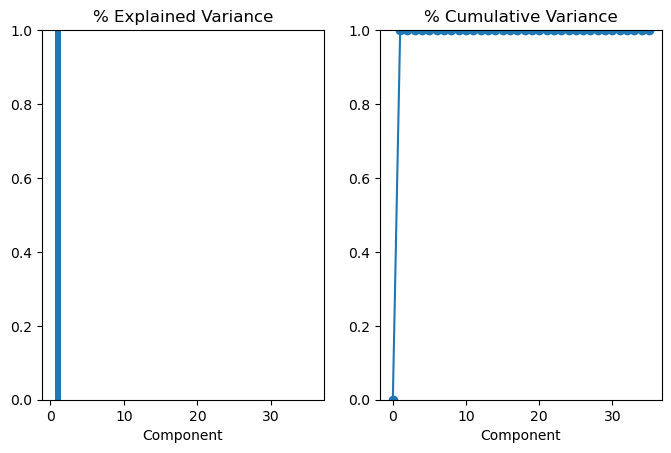

In [38]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca_Xworkdf)

The diagram depicts the amount of variance distribution of the main data based on the number of components. Since the variance of our original data is high; according to the graph, I must keep all of the components in order to cover the variance of the original data.

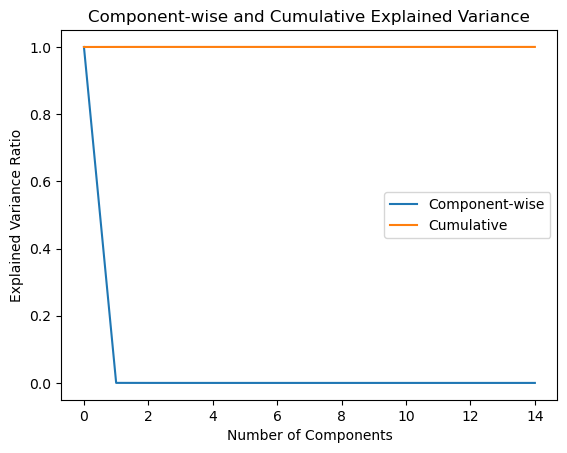

In [39]:
# plt.plot(range(15), pca_workdf.explained_variance_ratio_)
# plt.plot(range(15), np.cumsum(pca1.explained_variance_ratio_))
# plt.title("Component-wise and Cumulative Explained Variance")

plt.plot(range(15), pca_Xworkdf.explained_variance_ratio_[:15], label='Component-wise')
plt.plot(range(15), np.cumsum(pca_Xworkdf.explained_variance_ratio_[:15]), label='Cumulative')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


The above graph shows the Component-wise Change Process as well as the Cumulative Explained Variance as distributed by PCA. Since this is for the original data and our data has a high variance, I should keep the entire PCA, so applying PCA has no effect. The full PCA is then applied to Xworkdf_std.

In [40]:
# Full PCA for Xworkdf_std

pca_Xworkdf_std = PCA()
pca_Xworkdf_std.fit_transform(Xworkdf_std)

array([[-1.13986006e+00,  5.84050364e-01, -1.29576594e+00, ...,
         9.19714291e-02,  1.86400534e-15,  1.41562004e-15],
       [ 3.30118718e+00, -3.46989379e-01,  3.26028546e+00, ...,
        -9.27901560e-02, -1.97632446e-15, -1.60075184e-15],
       [-2.85374664e+00, -2.28849190e-01,  2.48152453e-01, ...,
        -1.82193433e-02,  1.49043233e-15,  1.52312154e-15],
       ...,
       [ 4.87728744e+00, -5.20454907e-01,  2.10032925e+00, ...,
        -4.53898672e-01,  2.14284574e-16, -4.64541647e-16],
       [-1.46488720e+00,  1.59442637e+00, -7.99031199e-01, ...,
         3.21935267e-01, -9.98549815e-16,  3.37802986e-16],
       [-7.43499266e-01, -1.56008163e+00, -2.98603125e-01, ...,
         5.31689294e-01,  3.42387628e-16, -1.31744577e-16]])

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

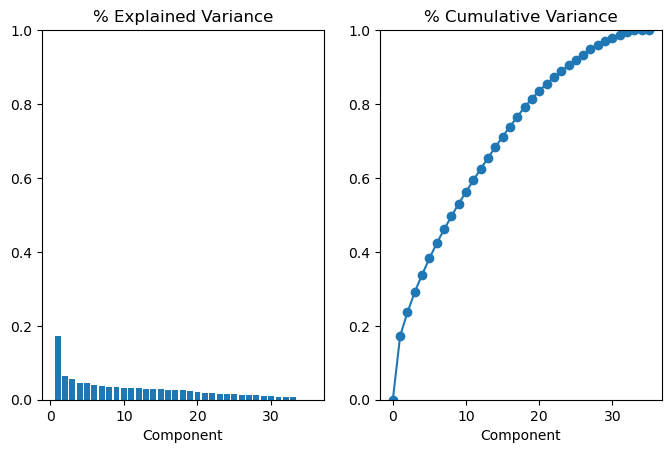

In [41]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca_Xworkdf_std)

I draw PCA graphs after applying it on Xworkdf_std. For example, in graphs Explained Variance and Cumulative Variance, the first 5 components of PCA cover nearly 40% of the variance of data, which is the 33% mentioned in the next question.

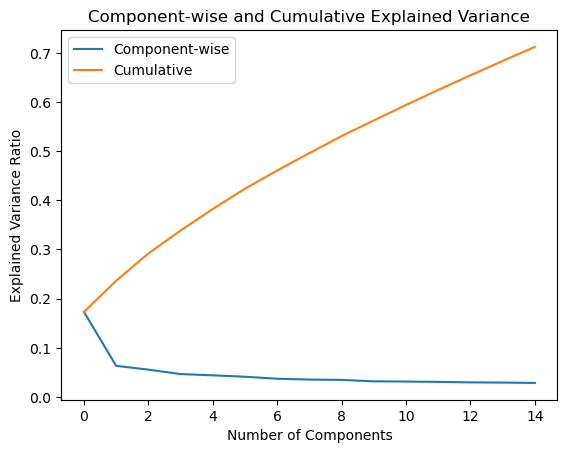

In [42]:
# plt.plot(range(15), pca_Xworkdf_std.explained_variance_ratio_)
# plt.plot(range(15), np.cumsum(pca2.explained_variance_ratio_))
# plt.title("Component-wise and Cumulative Explained Variance")


plt.plot(range(15), pca_Xworkdf_std.explained_variance_ratio_[:15], label='Component-wise')
plt.plot(range(15), np.cumsum(pca_Xworkdf_std.explained_variance_ratio_[:15]), label='Cumulative')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

This graph shows that 4 PCA accounts for approximately 40% of the variance. In fact, this chart is a hybrid of the two above.

Finally, I perform a full PCA on Xworkd_mm.

In [43]:
# Full PCA for Xworkdf_std

pca_Xworkdf_mm = PCA()
pca_Xworkdf_mm.fit_transform(Xworkdf_mm)

array([[-3.78814851e-01, -6.86587813e-01, -6.51748012e-01, ...,
         1.44110573e-03,  6.48600536e-16,  4.65870152e-16],
       [ 8.34828473e-01, -4.47366136e-01,  3.31635364e-01, ...,
        -1.01624895e-02, -1.07495647e-16, -2.45741163e-16],
       [ 5.28968526e-01, -4.95636841e-01, -7.87476235e-01, ...,
         1.58238590e-03, -3.99535131e-17, -5.66398868e-18],
       ...,
       [ 5.45156576e-01, -4.30971269e-01,  1.26745293e+00, ...,
        -2.55581346e-03,  6.23038920e-18, -5.33217563e-17],
       [ 5.63768391e-01, -1.37964417e-01, -3.16462685e-01, ...,
        -2.81495286e-03,  1.06357281e-16, -8.34712548e-17],
       [-7.02634634e-01,  5.94141666e-01, -1.31074007e-01, ...,
        -1.93332412e-03,  3.45919152e-17, -4.52607595e-17]])

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

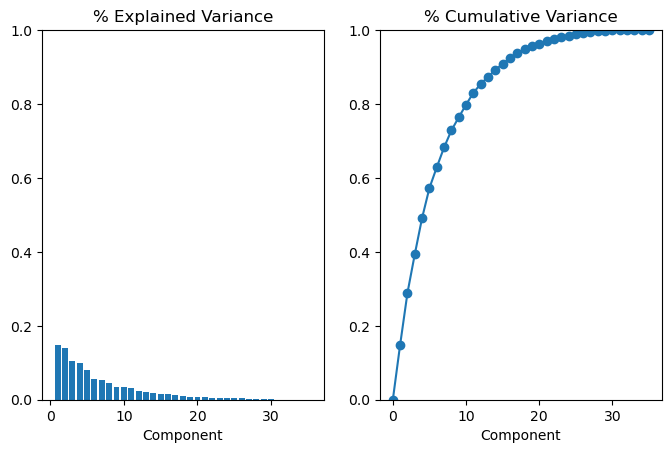

In [44]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca_Xworkdf_mm)

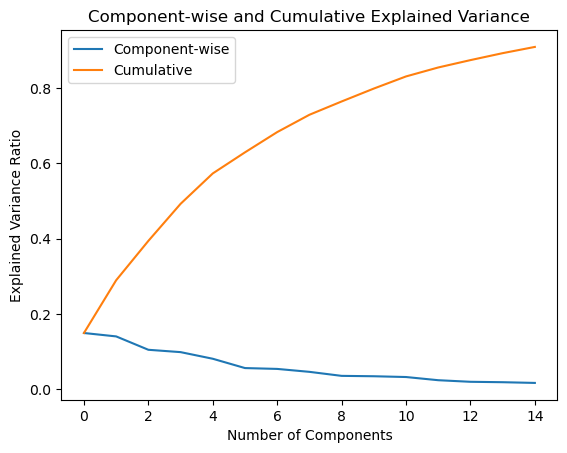

In [45]:
# plt.plot(range(15), pca3.explained_variance_ratio_)
# plt.plot(range(15), np.cumsum(pca3.explained_variance_ratio_))
# plt.title("Component-wise and Cumulative Explained Variance")

plt.plot(range(15), pca_Xworkdf_mm.explained_variance_ratio_[:15], label='Component-wise')
plt.plot(range(15), np.cumsum(pca_Xworkdf_mm.explained_variance_ratio_[:15]), label='Cumulative')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

PCA graphs are produced after being applied to Xworkdf_mm. I can see that the three graphs mentioned above resemble Xworkdf_std.

<div>
    <h2 class='header-font'>Exercise 4 (Dimensionality Reduction and Interpretation of the PCs):</h2>
</div>


Apply the PCA to both2 Xworkdf std and Xworkdf mm, selecting m PCs such that
m=min{m', 5},

where m' is the minimum number of PCs that explains 33% of the total variance. Plot the
barplots of percentage of explained variance, with respect to the PCs. Then:

Given the PCs of Xworkdf std and Xworkdf mm, give them an interpretation and, therefore, a name. Tables and/or plots are welcome;


In [46]:
# Get the explained variance ratio
explained_variance_ratio_std = pca_Xworkdf_std.explained_variance_ratio_
# print("Explained Variance Ratio (Standardized Data):", explained_variance_ratio_std)

# Calculate the cumulative explained variance
cumulative_variance_std = np.cumsum(explained_variance_ratio_std)
# print("Cumulative Explained Variance (Standardized Data):", cumulative_variance_std)

# Find the minimum number of PCs that explain at least 33% of the variance
m_prime_std = np.argmax(cumulative_variance_std >= 0.33) + 1
print("m' (Standardized Data):", m_prime_std)

# Calculate m
m_std = min(m_prime_std, 5)
print("m (Standardized Data):", m_std)

m' (Standardized Data): 4
m (Standardized Data): 4


In [47]:
# Get the explained variance ratio
explained_variance_ratio_mm = pca_Xworkdf_mm.explained_variance_ratio_
# print("Explained Variance Ratio (Standardized Data):", explained_variance_ratio_mm)

# Step 3: Calculate the cumulative explained variance
cumulative_variance_mm = np.cumsum(explained_variance_ratio_mm)
# print("Cumulative Explained Variance (Standardized Data):", cumulative_variance_mm)

# Step 4: Find the minimum number of PCs that explain at least 33% of the variance
m_prime_mm = np.argmax(cumulative_variance_mm >= 0.33) + 1
print("m' (Standardized Data):", m_prime_mm)

# Step 5: Calculate m
m_mm = min(m_prime_mm, 5)
print("m (Standardized Data):", m_mm)

m' (Standardized Data): 3
m (Standardized Data): 3


Apply the PCA with 4 PCs to Xworkdf_std

In [48]:
# INITIALIZE THE PCA
m = 4
pca_Xworkdf_std = PCA(n_components=m)
m4_pca_Xworkdf_std = pca_Xworkdf_std.fit_transform(Xworkdf_std)

component_names = [f"PC{i+1}" for i in range(m4_pca_Xworkdf_std.shape[1])]
m4_pca_Xworkdf_std = pd.DataFrame(m4_pca_Xworkdf_std, columns=component_names)

m4_pca_Xworkdf_std.head()

,PC1,PC2,PC3,PC4
0,-1.140228,0.597742,-1.148864,-0.515009
1,3.301671,-0.316078,3.300740,-2.053352
2,-2.853591,-0.160328,0.402885,-1.494170
3,0.097903,3.890814,1.460109,0.501378
4,-1.941985,0.693540,-1.112592,1.891007


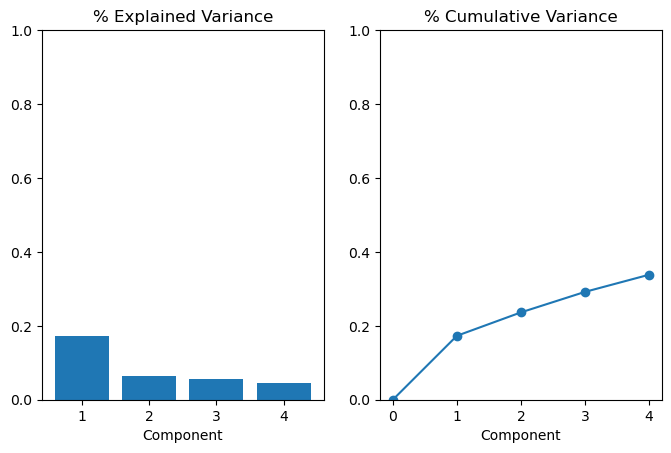

In [49]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    # MAKE THE BARPLOT
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca_Xworkdf_std);


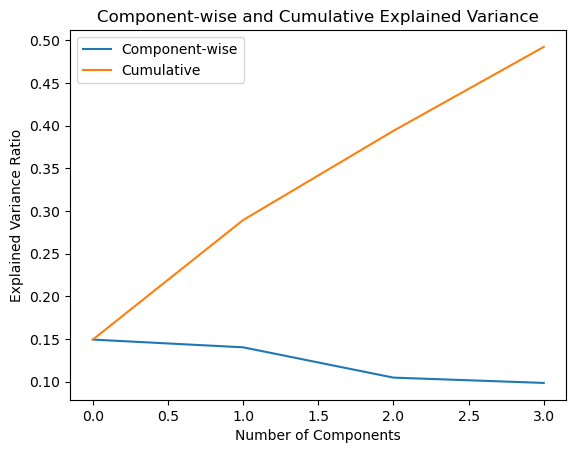

In [50]:
plt.plot(range(4), pca_Xworkdf_mm.explained_variance_ratio_[:4], label='Component-wise')
plt.plot(range(4), np.cumsum(pca_Xworkdf_mm.explained_variance_ratio_[:4]), label='Cumulative')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

In [51]:
# INITIALIZE THE PCA
m = 3
pca_Xworkdf_mm = PCA(n_components=m)
m3_pca_Xworkdf_mm = pca_Xworkdf_mm.fit_transform(Xworkdf_mm)

component_names = [f"PC{i+1}" for i in range(m3_pca_Xworkdf_mm.shape[1])]
m3_pca_Xworkdf_mm = pd.DataFrame(m3_pca_Xworkdf_mm, columns=component_names)

m3_pca_Xworkdf_mm.head()

,PC1,PC2,PC3
0,-0.378815,-0.686588,-0.651750
1,0.834829,-0.447367,0.331632
2,0.528969,-0.495637,-0.787476
3,0.820917,-0.083974,0.678272
4,-0.647224,0.612967,-0.383814


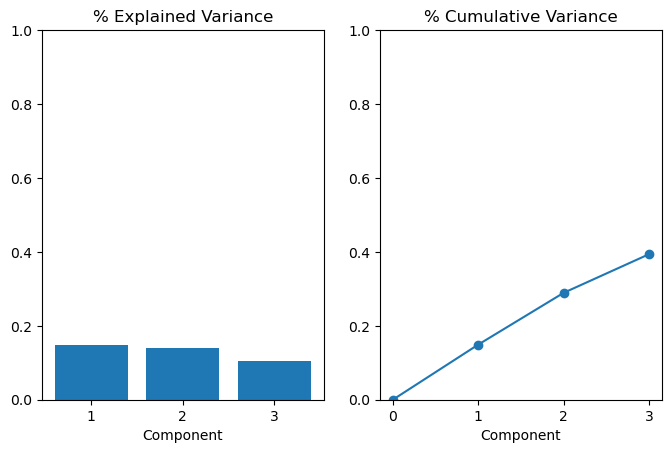

In [52]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    # MAKE THE BARPLOT
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
plot_variance(pca_Xworkdf_mm);

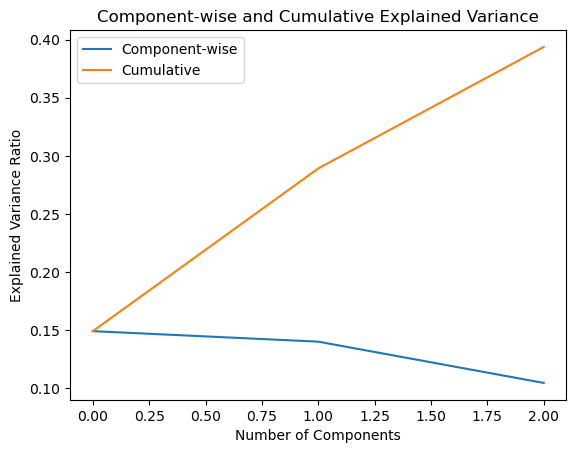

In [53]:
plt.plot(range(3), pca_Xworkdf_mm.explained_variance_ratio_[:3], label='Component-wise')
plt.plot(range(3), np.cumsum(pca_Xworkdf_mm.explained_variance_ratio_[:3]), label='Cumulative')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

Plot the barplots of percentage of explained variance, with respect to the PCs.

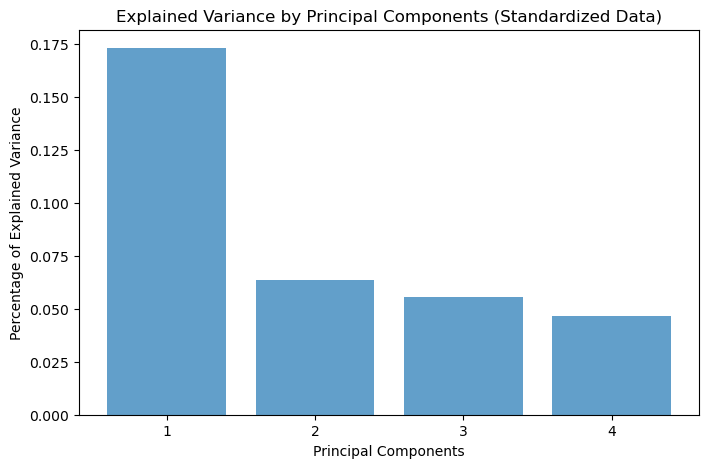

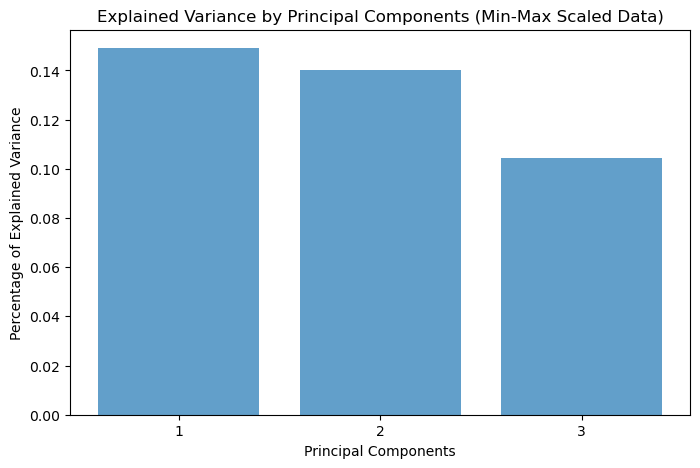

In [54]:
# Explained variance ratios for the selected principal components
explained_variance_ratio_std_selected = explained_variance_ratio_std[:4]
explained_variance_ratio_mm_selected = explained_variance_ratio_mm[:3]

# Plot for Xworkdf_std (m = 4)
plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), explained_variance_ratio_std_selected, alpha=0.7, align='center')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components (Standardized Data)')
plt.xticks(range(1, 5))  # Ensure x-ticks are the PC numbers
plt.show()

# Plot for Xworkdf_mm (m = 3)
plt.figure(figsize=(8, 5))
plt.bar(range(1, 4), explained_variance_ratio_mm_selected, alpha=0.7, align='center')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components (Min-Max Scaled Data)')
plt.xticks(range(1, 4))  # Ensure x-ticks are the PC numbers
plt.show()

In [55]:
# Sum the explained variance ratios
total_explained_variance_std = sum(explained_variance_ratio_std_selected)
print("Total Explained Variance (Standardized Data):", total_explained_variance_std)


Total Explained Variance (Standardized Data): 0.3384416484881116


In [56]:
# Sum the explained variance ratios
total_explained_variance_mm = sum(explained_variance_ratio_mm_selected)
print("Total Explained Variance (Standardized Data):", total_explained_variance_mm)

Total Explained Variance (Standardized Data): 0.39376856104267416


### Given the PCs of Xworkdf_std and Xworkdf_mm, give them an interpretation and, therefore, a name. Tables and/or plots are welcome;

In [57]:
# Get loadings for standardized data
loadings_std = pca_Xworkdf_std.components_

# Get loadings for min-max scaled data
loadings_mm = pca_Xworkdf_mm.components_

# Assuming the original dataframe columns are named, e.g., columns = ['var1', 'var2', ..., 'varN']
feature_names = Xworkdf_std.columns

# Create DataFrames for better visualization
loadings_std_df = pd.DataFrame(loadings_std, columns=feature_names)
loadings_mm_df = pd.DataFrame(loadings_mm, columns=feature_names)

In [58]:
# Display the loadings for interpretation
print("Loadings for Standardized Data:")
print(loadings_std_df.head(4))  # Only showing the first 4 PCs

print("\nLoadings for Min-Max Scaled Data:")
print(loadings_mm_df.head(3))  # Only showing the first 3 PCs

Loadings for Standardized Data:
         0         1         2         3         4         5         6   \
0  0.287188 -0.260255 -0.059579 -0.002916  0.315515  0.274098  0.321833   
1  0.082630 -0.050738  0.425186  0.000981  0.227779 -0.174238 -0.099123   
2 -0.060937  0.096135 -0.285520 -0.114177  0.097157 -0.152935 -0.003817   
3 -0.075397  0.097007  0.084999 -0.083563  0.040929 -0.007224 -0.061518   

         7         8         9   ...        25        26        27        28  \
0  0.286379  0.281747  0.229703  ... -0.016858  0.006146  0.030083 -0.003756   
1 -0.183900 -0.153895  0.031858  ... -0.136863  0.069186  0.110784  0.054530   
2 -0.129979 -0.152690 -0.160699  ...  0.135556 -0.040366 -0.043993  0.020779   
3 -0.043780 -0.002118  0.226534  ...  0.134698 -0.297135  0.007444  0.020396   

         29        30        31        32        33        34  
0 -0.014800 -0.070080  0.029270 -0.011032  0.011857  0.074116  
1 -0.085147 -0.134862 -0.259965  0.145483  0.293813  0.328473  

In [59]:
# Define a function to identify significant loadings for each PC
def identify_significant_loadings(loadings_df, pc_number, num_features=3):
    pc_loadings = loadings_df.iloc[pc_number - 1]  # -1 because PC indices start from 0
    significant_loadings = pc_loadings.abs().nlargest(num_features)
    return significant_loadings

# Define a function to interpret PCs and give them names
def interpret_pcs(loadings_df, num_pcs=4, num_features=3):
    pc_names = []
    for pc_number in range(1, num_pcs + 1):
        significant_loadings = identify_significant_loadings(loadings_df, pc_number, num_features)
        pc_name = f"PC{pc_number}: "
        for feature, loading in significant_loadings.iteritems():
            pc_name += f"{feature}({loading:.2f}), "
        pc_names.append(pc_name[:-2])  # Remove the trailing comma and space
    return pc_names


# Interpret PCs for Xworkdf_std
pc_names_std = interpret_pcs(loadings_std_df, num_pcs=4, num_features=3)

# Interpret PCs for Xworkdf_mm
pc_names_mm = interpret_pcs(loadings_mm_df, num_pcs=3, num_features=3)

In [60]:
pc_names_std

['PC1: 12(0.34), 6(0.32), 4(0.32)',
 'PC2: 2(0.43), 10(0.34), 34(0.33)',
 'PC3: 16(0.38), 20(0.37), 15(0.30)',
 'PC4: 31(0.52), 32(0.33), 26(0.30)']

In [61]:
pc_names_mm

['PC1: 31(0.82), 33(0.44), 32(0.28)',
 'PC2: 24(0.82), 26(0.47), 25(0.26)',
 'PC3: 20(0.46), 26(0.43), 25(0.41)']

In [62]:
# Assuming loadings_std_df and loadings_mm_df are already defined
# Call the interpret_pcs function for both datasets
pc_names_std = interpret_pcs(loadings_std_df, num_pcs=4, num_features=3)
pc_names_mm = interpret_pcs(loadings_mm_df, num_pcs=3, num_features=3)

# Print the interpreted names for each PC
print("Interpreted PCs for Xworkdf_std:")
for pc_name in pc_names_std:
    print(pc_name)

print("\nInterpreted PCs for Xworkdf_mm:")
for pc_name in pc_names_mm:
    print(pc_name)


Interpreted PCs for Xworkdf_std:
PC1: 12(0.34), 6(0.32), 4(0.32)
PC2: 2(0.43), 10(0.34), 34(0.33)
PC3: 16(0.38), 20(0.37), 15(0.30)
PC4: 31(0.52), 32(0.33), 26(0.30)

Interpreted PCs for Xworkdf_mm:
PC1: 31(0.82), 33(0.44), 32(0.28)
PC2: 24(0.82), 26(0.47), 25(0.26)
PC3: 20(0.46), 26(0.43), 25(0.41)


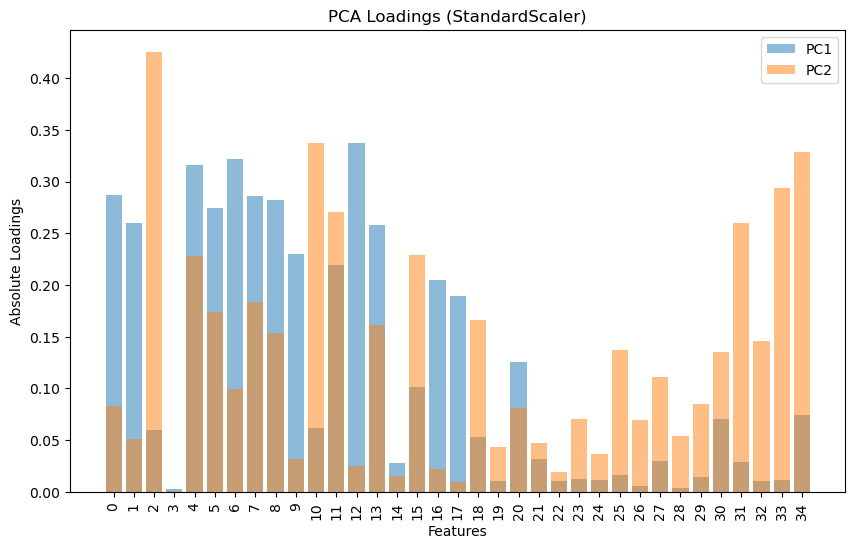

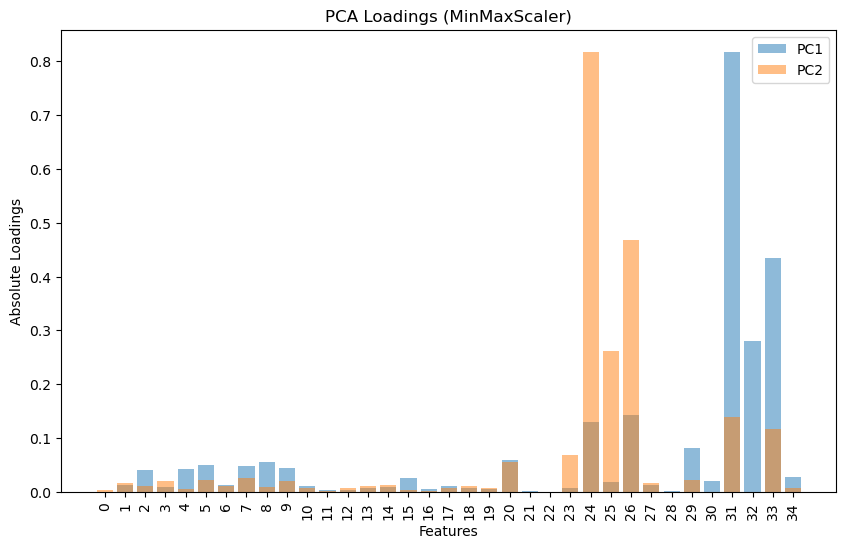

In [63]:
import numpy as np

# Function to plot PCA loadings
def plot_pca_loadings(pca, scaler_name):
    # Get the absolute loadings for the first two principal components
    abs_loadings = np.abs(pca.components_[:2])

    # Transpose the loadings to have features as rows and PCs as columns
    abs_loadings = abs_loadings.T

    # Plot the loadings
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(abs_loadings)), abs_loadings[:, 0], alpha=0.5, label='PC1')
    plt.bar(range(len(abs_loadings)), abs_loadings[:, 1], alpha=0.5, label='PC2')
    plt.xticks(range(len(abs_loadings)), Xworkdf_std.columns, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Absolute Loadings')
    plt.title(f'PCA Loadings ({scaler_name})')
    plt.legend()
    plt.show()

# Plot PCA loadings for Xworkdf_std
plot_pca_loadings(pca_Xworkdf_std, 'StandardScaler')

# Plot PCA loadings for Xworkdf_mm
plot_pca_loadings(pca_Xworkdf_mm, 'MinMaxScaler')


With respect to the given plots and tables I can see that first three PCA’s are sufficient for covering the 33% of total variance

# Exercise 5 (k-Means):

I apply the “PC-space” to the two DFs and run the k-Means algorithm on them. I want to use the silhouette coefficient to choose the optimal value for k between 3 to 10.

Therefore, I apply the k-means for the Xworkdf_std with the given PC-space above which is m4_pca_Xworkdf_std

In [64]:
# Implement K-means on Xworkdf_std with m=4(m4_pca_Xworkdf_std)
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(m4_pca_Xworkdf_std)

KMeans(n_clusters=2, random_state=0)

In [65]:
kmeans.cluster_centers_

array([[-1.61338672,  0.08101983,  0.07344035,  0.03807089],
       [ 2.84732879, -0.142985  , -0.12960861, -0.06718806]])

In cluster analysis, the Elbow Method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

I use the Elbow method to find out the best possible number of clusters.

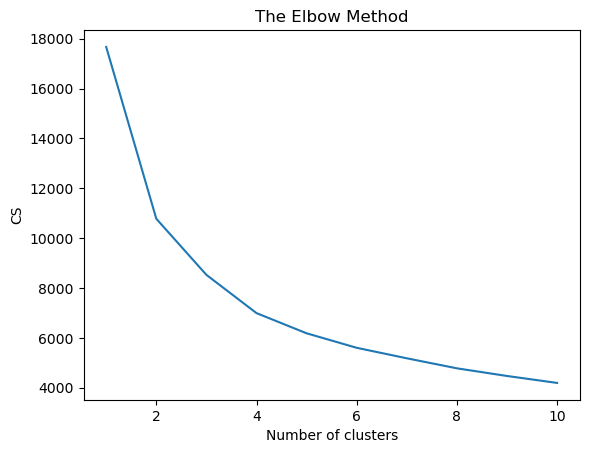

In [66]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(m4_pca_Xworkdf_std)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Silhouette Coefficient: is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is defined as the below formula. To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is .

Silhouette Coefficient: is calculated using the mean intra-cluster distance (𝑎) and the mean nearest-cluster distance (𝑏) for each sample. The Silhouette Coefficient for a sample is defined as the below formula. To clarify, 𝑏 is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is
2 <= 𝑛𝑙𝑎𝑏𝑒𝑙𝑠 <= 𝑛𝑠𝑎𝑚𝑝𝑙𝑒𝑠 − 1.

The best value is 1 and the worst value is −1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

for each 𝑥 ∈ 𝑆, s.t. 𝑥 ∈ 𝑉𝑖, it is defined

𝑠(𝑥) ∶= 𝑏(𝑥) − 𝑎(𝑥)/ 𝑚𝑎𝑥{𝑎(𝑥), 𝑏(𝑥)}

In [67]:
silhoutte_coefficient=[]
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [68]:
for k in range (2,11):
        kmeans=KMeans(n_clusters=k,**kmeans_set)
        kmeans.fit(m4_pca_Xworkdf_std)
        score=silhouette_score(m4_pca_Xworkdf_std,kmeans.labels_)
        silhoutte_coefficient.append(score)

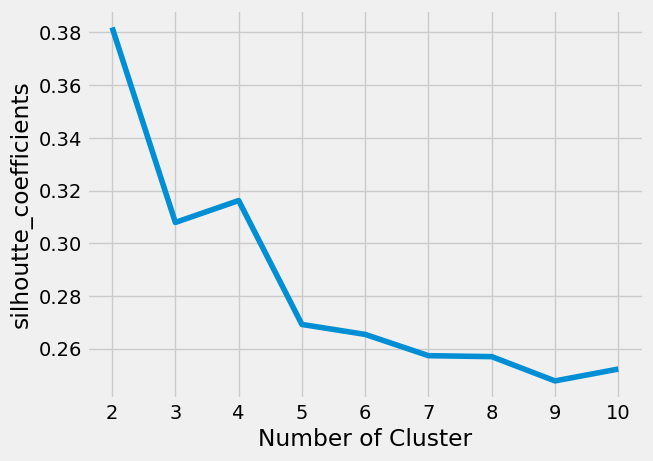

In [69]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhoutte_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("silhoutte_coefficients")
plt.show()

According to the Elbow technique graphic, four clusters are the ideal number to use when clustering my data. According to the silhouette method The question is about selecting the ideal number of clusters, which might be either 4 or 6.

In the next step, I apply the exact same functions for the second dataset.(Xworkdf_mm)

In [70]:
# Implement K-means on Xworkdf_mm with m=3(m3_pca_Xworkdf_mm)
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(m3_pca_Xworkdf_mm)

KMeans(n_clusters=2, random_state=0)

In [71]:
kmeans.cluster_centers_

array([[-0.565096  , -0.09066574, -0.00496248],
       [ 0.57195027,  0.09176546,  0.00502267]])

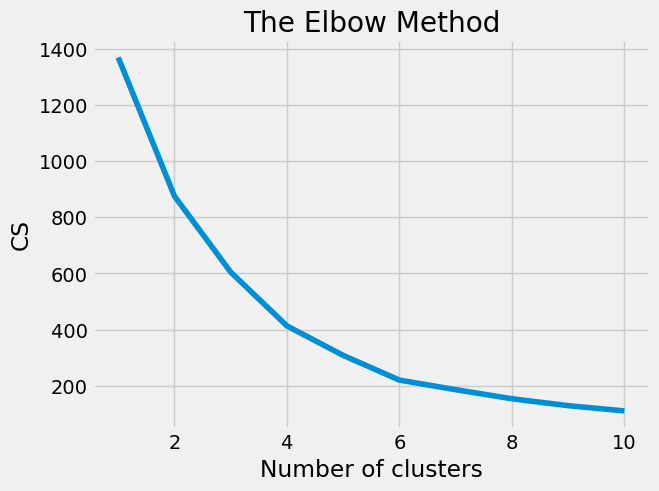

In [72]:
# I use the Elbow method to find out the best possible number of clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(m3_pca_Xworkdf_mm)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [73]:
silhoutte_coefficient=[]
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [74]:
for k in range (2,11):
        kmeans=KMeans(n_clusters=k,**kmeans_set)
        kmeans.fit(m3_pca_Xworkdf_mm)
        score=silhouette_score(m3_pca_Xworkdf_mm,kmeans.labels_)
        silhoutte_coefficient.append(score)

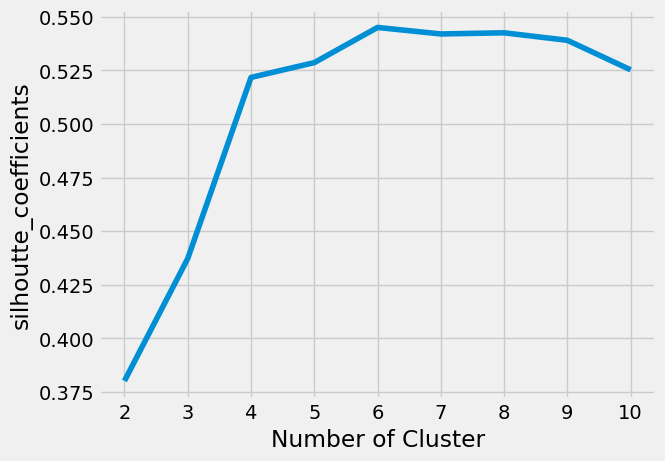

In [75]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhoutte_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("silhoutte_coefficients")
plt.show()

For the second dataset, I checked the number of clusters once more, and in this case, 4 is a good choice because it has a high coefficient. Therefore, I choose to separate it into 4 clusters.

# Exercise 6 (Clusters and Centroid Interpretation and Visualization)

On the first dataset m4_pca_Xworkdf_std, I cluster the data. I will take into account PC1 and PC2 and input their values into X1 in accordance with the identical PCAs that I have already specified. Kmeans are called, and X1 is fit. In order to display centroid 1 in the diagram later, I also divide the centroids using the kmeans algorithm. I create the plot.

In [76]:
X1=m4_pca_Xworkdf_std

In [77]:
X1 = X1[['PC1','PC2']].iloc[: , :].values

In [78]:
X1

array([[-1.14022817,  0.59774172],
       [ 3.30167079, -0.31607833],
       [-2.85359139, -0.16032793],
       ...,
       [ 4.87755422, -0.54211001],
       [-1.4646959 ,  1.60467526],
       [-0.74372093, -1.56149298]])

In [79]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels_std = algorithm.labels_
centroids_std = algorithm.cluster_centers_

In [80]:
labels_std.shape

(1493,)

In [81]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

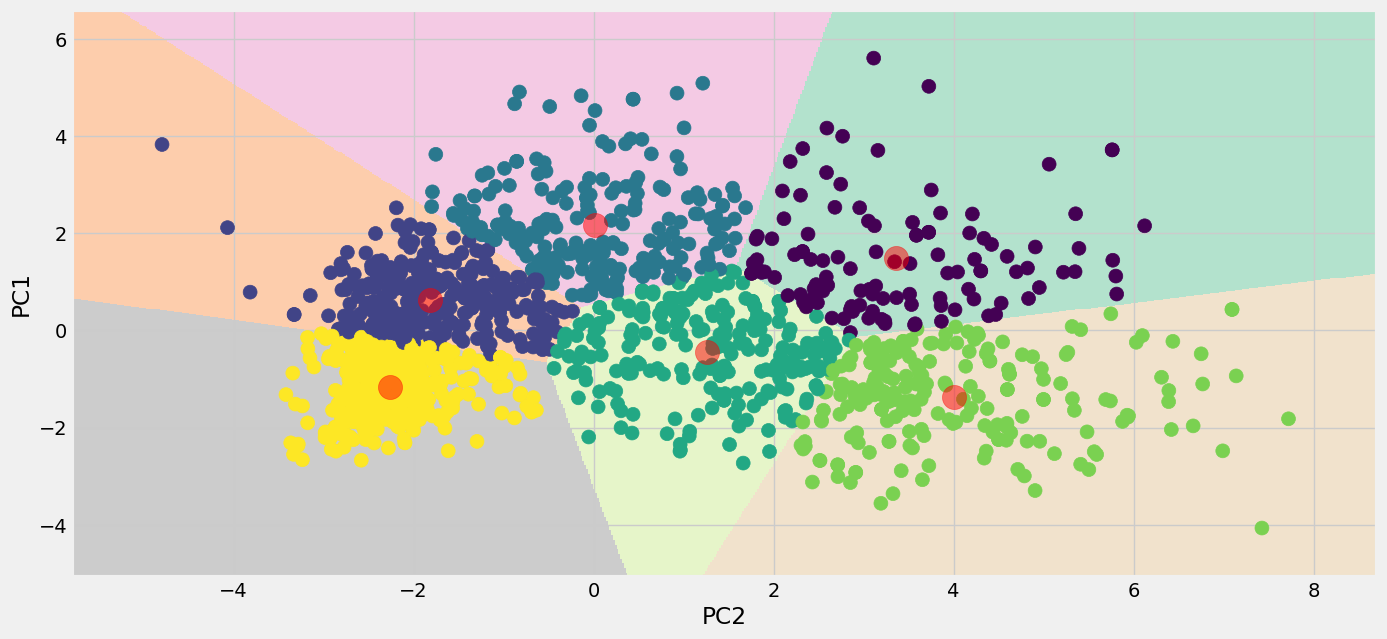

In [82]:
plt.figure(1 , figsize = (15 , 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1', y = 'PC2', data = m4_pca_Xworkdf_std, c = labels_std, s = 100)
plt.scatter(x = centroids_std[: , 0] , y =  centroids_std[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

For the second dataset m3_pca_Xworkdf_mm, I use the same procedure.

In [83]:
X2=m3_pca_Xworkdf_mm

In [84]:
X2 = X2[['PC1','PC2']].iloc[: , :].values

In [85]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels_mm = algorithm.labels_
centroids_mm = algorithm.cluster_centers_

In [86]:
labels_mm.shape

(1493,)

In [87]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

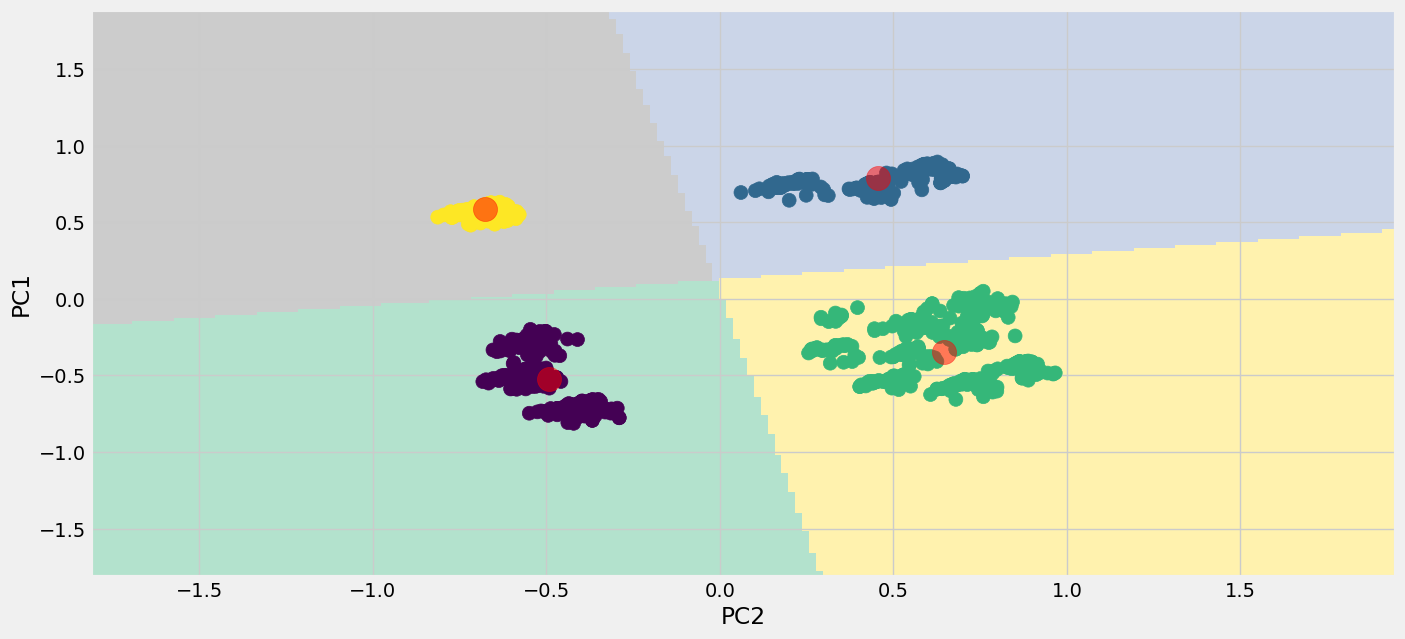

In [89]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1', y = 'PC2', data = m3_pca_Xworkdf_mm, c = labels_mm, s = 100)
plt.scatter(x = centroids_mm[: , 0] , y =  centroids_mm[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

# Exercise 7 - Clusters and Centroids Evaluation:

### For both the DFs, perform an internal and an external evaluation of the clusterings obtained. In particular:

Since there is no "concrete" aim, it is particularly difficult to evaluate the results of a clustering process. There are typically two major methods:

1.External evaluation: if the data are labeled, the final clusters are analyzed with respect to the labels of the data inside them.

calinski_harabasz_score: The score is defined as ratio of the sum of between the within-cluster dispersion and the between-cluster dispersion for all clusters.

If the ground truth labels are not known which is our case , the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.



2.Internal evaluation: These methods measure how much the clustering result produces clusters with high similarity within each cluster and low similarity between clusters.

Some of the most used internal evaluation methods for clustering are:

Davies-Bouldin index:

In [90]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

I apply them on the first dataset which ism4_pca_Xworkdf_std

In [91]:
for k in range (2,11):
        kmeans=KMeans(n_clusters=k,**kmeans_set)
        kmeans.fit(m4_pca_Xworkdf_std)

In [92]:
calinski_harabasz_coefficient=[]
score=calinski_harabasz_score(m4_pca_Xworkdf_std,kmeans.labels_)
calinski_harabasz_coefficient.append(score)

In [93]:
results = {}
# calculate the number of clusters according to the Calinski-Harabasz Index
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels_std = kmeans.fit_predict(m4_pca_Xworkdf_std)
    db_index = calinski_harabasz_score(m4_pca_Xworkdf_std,kmeans.labels_)
    results.update({i: db_index})

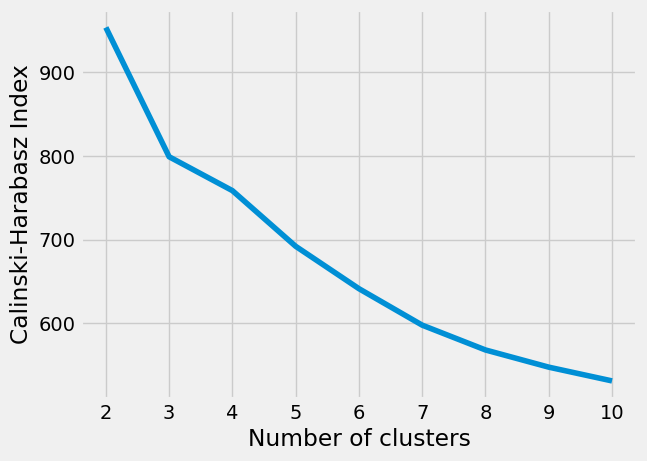

In [94]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [95]:
results = {}
# calculate the number of clusters according to davies_bouldin_score
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels_std = kmeans.fit_predict(m4_pca_Xworkdf_std)
    db_index = davies_bouldin_score(m4_pca_Xworkdf_std,kmeans.labels_)
    results.update({i: db_index})

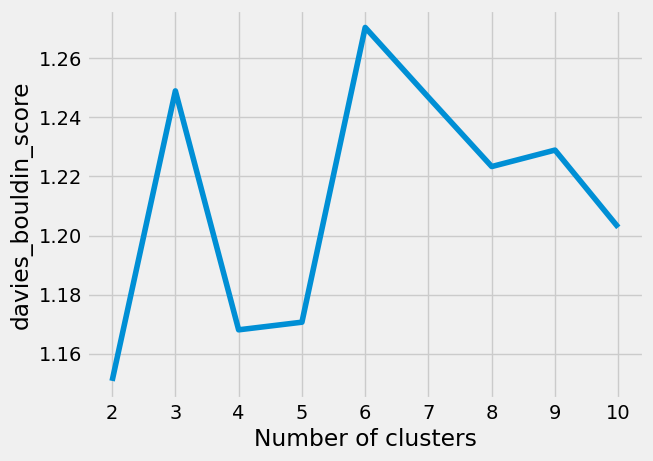

In [96]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("davies_bouldin_score")
plt.show()

As can be seen, the calinski harabasz score for clusters 4,5 and 6 is appropriate for this dataset. Additionally, The Davies_Bouldin_score has the minimal score, which is the best situation, is for 4 clusters.

I applied them on m3_pca_Xworkdf_mm.

In [97]:
for k in range (2,11):
    kmeans=KMeans(n_clusters=k,**kmeans_set)
    kmeans.fit(m3_pca_Xworkdf_mm)
        

In [98]:
calinski_harabasz_coefficient=[]
score=calinski_harabasz_score(m3_pca_Xworkdf_mm,kmeans.labels_)
calinski_harabasz_coefficient.append(score)

In [99]:
results = {}
# calculate the number of clusters according to the Calinski-Harabasz Index
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels_mm = kmeans.fit_predict(m3_pca_Xworkdf_mm)
    db_index = calinski_harabasz_score(m3_pca_Xworkdf_mm,kmeans.labels_)
    results.update({i: db_index})

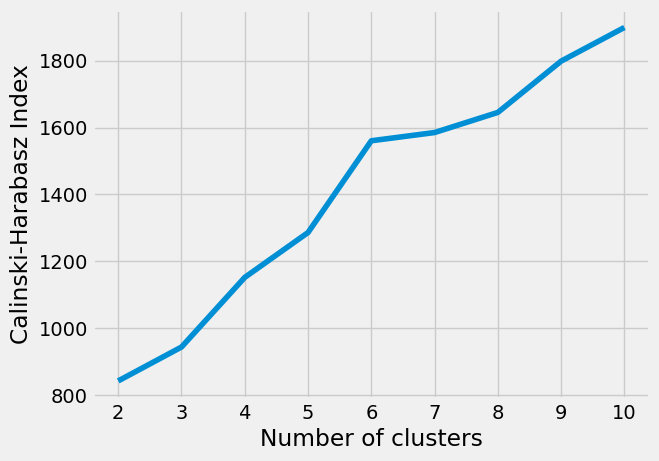

In [100]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [101]:
results = {}
# calculate the number of clusters according to davies_bouldin_score
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    labels_mm = kmeans.fit_predict(m3_pca_Xworkdf_mm)
    db_index = davies_bouldin_score(m3_pca_Xworkdf_mm,kmeans.labels_)
    results.update({i: db_index})

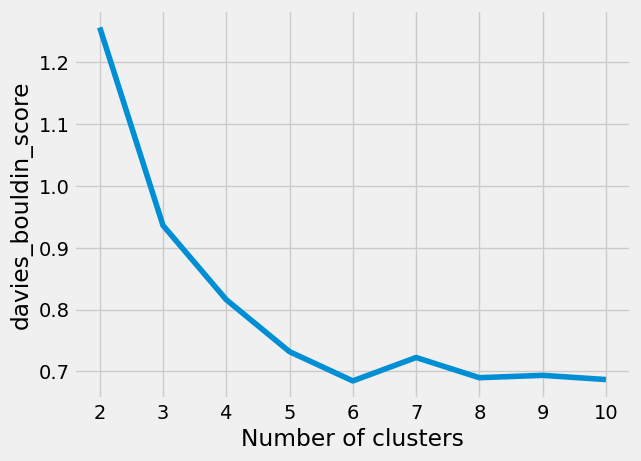

In [102]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("davies_bouldin_score")
plt.show()

I look at how their scores can be adjusted using the two functions I have. One Davies Bouldins and one Calinski Harabasz. With Davies Bouldins, I created the graphs, and I can see that there are 4 clusters, which is a good quantity for me. I observe that the number 6 is a decent number of clusters for Calinski Harabasz.

In [103]:
from sklearn.metrics import silhouette_score

# Function to compute silhouette score for a clustering
def compute_silhouette_score(data_pca, cluster_labels):
    # Compute silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    return silhouette_avg

# Compute silhouette score for Xworkdf_std clustering
silhouette_score_std = compute_silhouette_score(m4_pca_Xworkdf_std, labels_std)
print("Silhouette Score for m4_pca_Xworkdf_std:", silhouette_score_std)

# Compute silhouette score for Xworkdf_mm clustering
silhouette_score_mm = compute_silhouette_score(m3_pca_Xworkdf_mm, labels_mm)
print("Silhouette Score for m3_pca_Xworkdf_mm:", silhouette_score_mm)


Silhouette Score for m4_pca_Xworkdf_std: 0.25227990274685547
Silhouette Score for m3_pca_Xworkdf_mm: 0.5252246012653632


To comment on the results obtained from m4_pca_Xworkdf_std and m3_pca_Xworkdf_mm, I need to analyze the Silhouette Score within each cluster for both DataFrames and compare them. 

Internal Evaluation (Silhouette Score):
silhouette scores for both m4_pca_Xworkdf_std and m3_pca_Xworkdf:

- Xworkdf_std: Silhouette score = 0.25
- Xworkdf_mm: Silhouette score = 0.52

Higher silhouette scores for Xworkdf_mm indicate better-defined clusters.


